In [327]:
#imports
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot

In [328]:
#reading file
df=pd.read_csv("C:\Users\dear\Desktop\day.csv")

In [329]:
#getting familiar to data
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [330]:
df.shape

(731, 16)

In [331]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [332]:
df['season']=df['season'].astype('category')

In [333]:
df.dtypes

instant          int64
dteday          object
season        category
yr               int64
mnth             int64
holiday          int64
weekday          int64
workingday       int64
weathersit       int64
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object

In [334]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [335]:
df=df.drop(['dteday','instant','casual','registered'],axis=1)

In [336]:
df.shape

(731, 12)

In [337]:
df.isnull().sum().sort_values()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [338]:
df.head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349


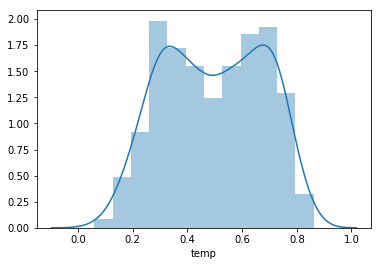

In [339]:
#univariate analysis
#continious variable
#distribution plots
sns.distplot(df['temp'])

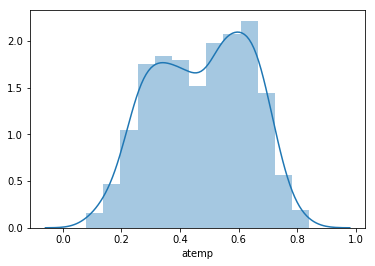

In [340]:
sns.distplot(df['atemp'])

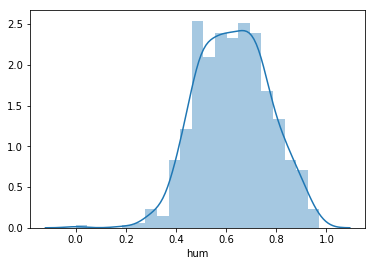

In [341]:
sns.distplot(df['hum'])

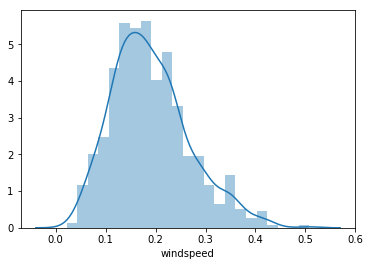

In [342]:
sns.distplot(df['windspeed'])

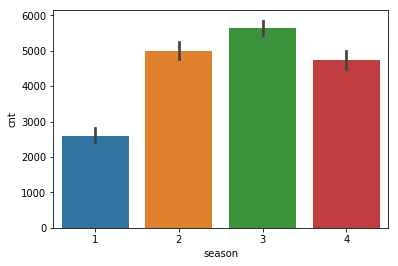

In [343]:
#univariate analysis
#classified variables
#histograms
sns.barplot(x='season',y='cnt',data=df)

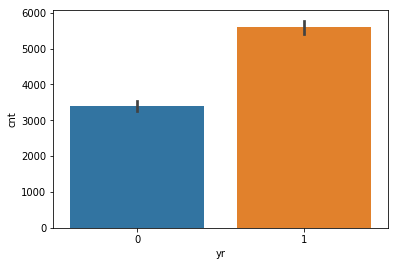

In [344]:
sns.barplot(x='yr',y='cnt',data=df)

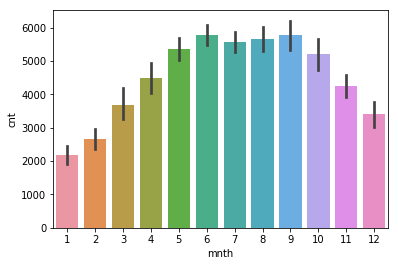

In [345]:
sns.barplot(x='mnth',y='cnt',data=df)

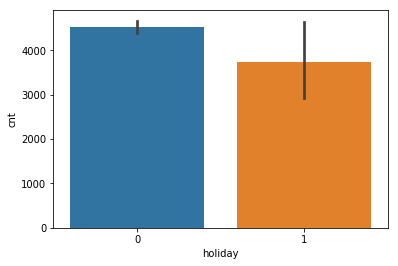

In [346]:
sns.barplot(x='holiday',y='cnt',data=df)

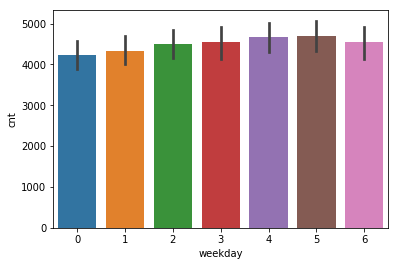

In [347]:
sns.barplot(x='weekday',y='cnt',data=df)

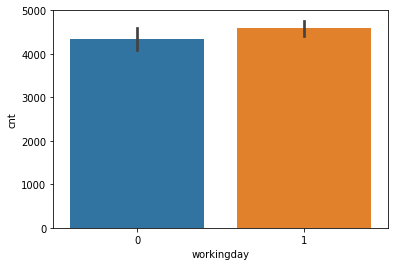

In [348]:
sns.barplot(x='workingday',y='cnt',data=df)

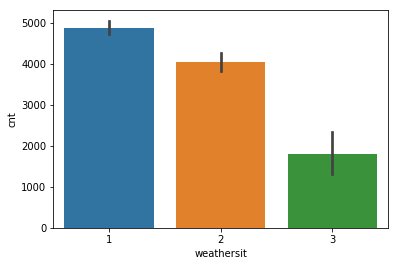

In [349]:
sns.barplot(x='weathersit',y='cnt',data=df)

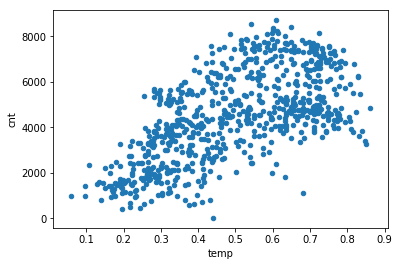

In [350]:
#scatter plots
df.plot.scatter(x='temp',y='cnt')

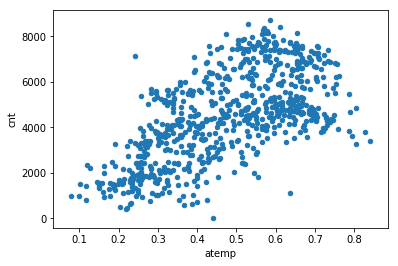

In [351]:
df.plot.scatter(x='atemp',y='cnt')

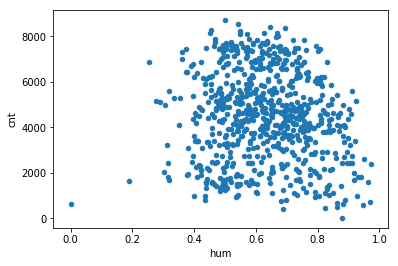

In [352]:
df.plot.scatter(x='hum',y='cnt')

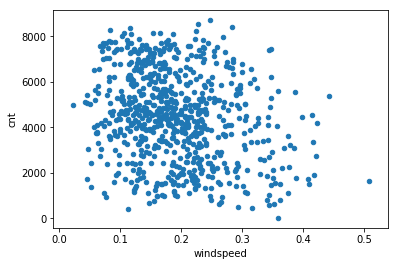

In [353]:
df.plot.scatter(x='windspeed',y='cnt')

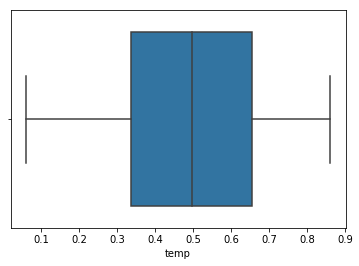

In [354]:
#box plots
sns.boxplot(x=df['temp'])

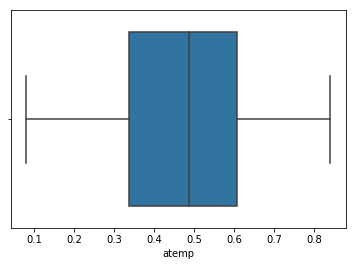

In [355]:
sns.boxplot(x=df['atemp'])

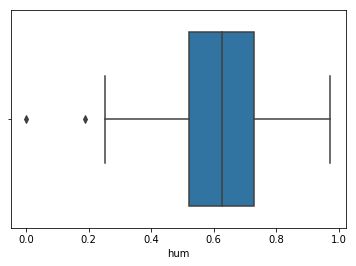

In [356]:
sns.boxplot(x=df['hum'])

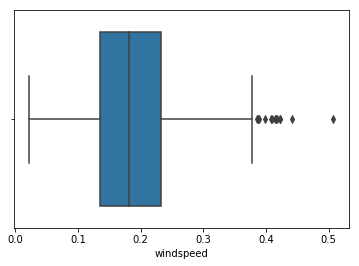

In [357]:
sns.boxplot(x=df['windspeed'])

In [358]:
#removing quartiles
cnames=['hum']

In [359]:
for i in cnames:
    Q3,Q1=np.percentile(df.loc[:,i],[75,25])
    IQR=Q3-Q1

In [360]:
min=Q1-(IQR*1.5)
max=Q3+(IQR*1.5)

In [361]:
min

0.20468725

In [362]:
max

1.0455212500000002

In [363]:
df_out=df

In [364]:
df_out=df_out.drop(df_out[df_out.loc[:,i]<min].index)

In [365]:
df_out=df_out.drop(df_out[df_out.loc[:,i]>max].index)

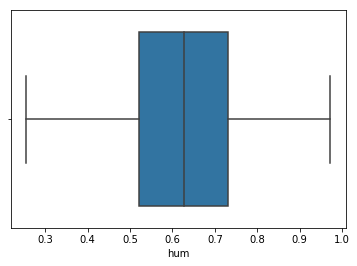

In [366]:
sns.boxplot(x=df_out['hum'])

In [367]:
cnames=['windspeed']

In [368]:
for i in cnames:
    Q3,Q1=np.percentile(df.loc[:,i],[75,25])
    IQR=Q3-Q1

In [369]:
min=Q1-(IQR*1.5)
max=Q3+(IQR*1.5)

In [370]:
df_out=df_out.drop(df_out[df_out.loc[:,i]<min].index)

In [371]:
df_out=df_out.drop(df_out[df_out.loc[:,i]>max].index)

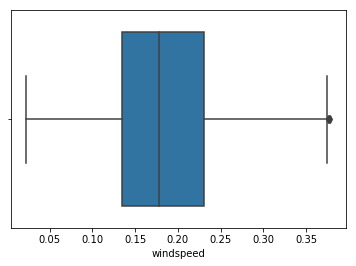

In [372]:
sns.boxplot(x=df_out['windspeed'])

In [373]:
#finding correlation between variables
df_out.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'),axis=1)

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
yr,1.0,-0.00099,0.0085,-0.0063,0.0051,-0.045,0.055,0.054,-0.12,-0.023,0.57
mnth,-0.00099,1.0,0.017,0.0087,-0.0017,0.043,0.22,0.22,0.2,-0.19,0.28
holiday,0.0085,0.017,1.0,-0.1,-0.26,-0.035,-0.031,-0.035,-0.021,0.017,-0.072
weekday,-0.0063,0.0087,-0.1,1.0,0.041,0.032,0.0018,-0.0054,-0.043,0.0099,0.072
workingday,0.0051,-0.0017,-0.26,0.041,1.0,0.058,0.046,0.044,0.023,-0.011,0.056
weathersit,-0.045,0.043,-0.035,0.032,0.058,1.0,-0.13,-0.13,0.62,0.059,-0.3
temp,0.055,0.22,-0.031,0.0018,0.046,-0.13,1.0,0.99,0.11,-0.14,0.63
atemp,0.054,0.22,-0.035,-0.0054,0.044,-0.13,0.99,1.0,0.13,-0.17,0.63
hum,-0.12,0.2,-0.021,-0.043,0.023,0.62,0.11,0.13,1.0,-0.2,-0.14
windspeed,-0.023,-0.19,0.017,0.0099,-0.011,0.059,-0.14,-0.17,-0.2,1.0,-0.22


In [374]:
corr=df_out.corr()

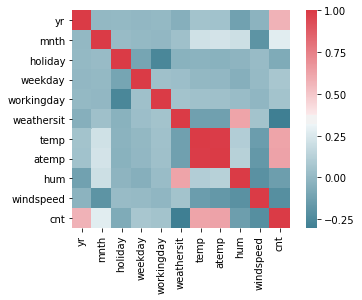

In [375]:
sns.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),cmap=sns.diverging_palette(220,10,as_cmap=True),square=True)

In [376]:
#feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [377]:
X=df_out.drop('cnt',axis=1)

In [378]:
Y=df_out['cnt']

In [379]:
bestfeature=SelectKBest(score_func=chi2,k=10)

In [380]:
fit=bestfeature.fit(X,Y)

In [381]:
dfscores=pd.DataFrame(fit.scores_)

In [382]:
dfcolumns=pd.DataFrame(X.columns)

In [383]:
featureScores=pd.concat([dfcolumns,dfscores],axis=1)

In [384]:
featureScores.columns=['variables','Importance Score']

In [385]:
featureScores.nlargest(12,'Importance Score')

,variables,Importance Score
2,mnth,1233.680128
4,weekday,916.440642
3,holiday,644.785714
1,yr,346.983240
0,season,333.681188
5,workingday,215.778004
6,weathersit,143.263237
7,temp,46.863598
8,atemp,38.648585
9,hum,20.974891


In [386]:
df_new=df_out.drop(['atemp'],axis=1)

In [387]:
#creating dummies
cat_feats=['season','yr','mnth','holiday','weekday','workingday','weathersit']

In [388]:
df_final=pd.get_dummies(df_new,columns=cat_feats)

In [389]:
df_final.head()

,temp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,yr_0,yr_1,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3
0,0.344167,0.805833,0.160446,985,1,0,0,0,1,0,...,0,0,0,0,1,1,0,0,1,0
1,0.363478,0.696087,0.248539,801,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,0.196364,0.437273,0.248309,1349,1,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
3,0.200000,0.590435,0.160296,1562,1,0,0,0,1,0,...,1,0,0,0,0,0,1,1,0,0
4,0.226957,0.436957,0.186900,1600,1,0,0,0,1,0,...,0,1,0,0,0,0,1,1,0,0


In [390]:
#creating training and testing data
from sklearn.model_selection import train_test_split
X=df_final.drop(['cnt'],axis=1)
Y=df_final['cnt']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=101)

In [391]:
#decision tree regressor
from sklearn.tree import DecisionTreeRegressor
dtree=DecisionTreeRegressor()
dtree.fit(X_train,Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [392]:
pred_DT=dtree.predict(X_test)

In [393]:
#random forest regressor
from sklearn.ensemble import RandomForestRegressor

In [394]:
rfr=RandomForestRegressor(n_estimators=600,random_state=101)
rfr.fit(X_train,Y_train)
pred_rfr=rfr.predict(X_test)

In [395]:
#linear regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)
pred_lr=lr.predict(X_test)

In [396]:
'Coefficients:\n',lr.coef_

('Coefficients:\n',
 array([ 4.22728041e+03, -2.15773989e+03, -2.92690705e+03, -1.00516470e+17,
        -1.00516470e+17, -1.00516470e+17, -1.00516470e+17,  1.87037934e+17,
         1.87037934e+17, -2.96874984e+16, -2.96874984e+16, -2.96874984e+16,
        -2.96874984e+16, -2.96874984e+16, -2.96874984e+16, -2.96874984e+16,
        -2.96874984e+16, -2.96874984e+16, -2.96874984e+16, -2.96874984e+16,
        -2.96874984e+16, -2.94176739e+16,  5.21662701e+16,  3.74076364e+16,
        -4.41763076e+16, -4.41763076e+16, -4.41763076e+16, -4.41763076e+16,
        -4.41763076e+16,  3.74076364e+16, -4.07919720e+16,  4.07919720e+16,
         2.75303141e+16,  2.75303141e+16,  2.75303141e+16]))

Text(0,0.5,'Predicted Y')

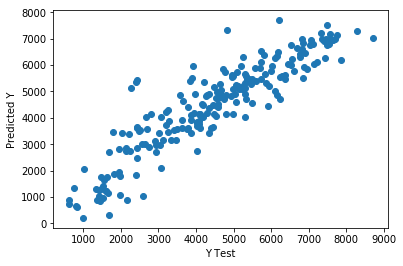

In [397]:
plt.scatter(Y_test,pred_lr)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [398]:
#predictions with only importaint data
rfr.feature_importances_

array([0.48325718, 0.07456132, 0.03164829, 0.02918897, 0.00193675,
       0.00060272, 0.03407421, 0.14208828, 0.13116184, 0.00352369,
       0.00123671, 0.00206476, 0.00444063, 0.00163337, 0.00139063,
       0.00061785, 0.00054915, 0.00338826, 0.0047992 , 0.0005819 ,
       0.00323448, 0.00126113, 0.00137055, 0.00487114, 0.00224789,
       0.0017434 , 0.00174625, 0.002266  , 0.00153226, 0.00294034,
       0.00175176, 0.00183243, 0.00455616, 0.00270378, 0.0131967 ])

Text(0.5,1,'Variable Importances')

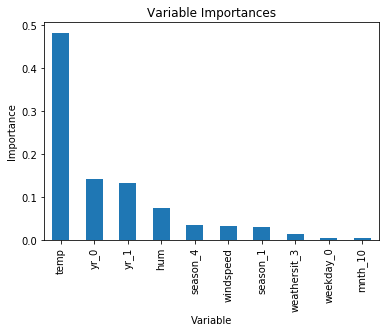

In [399]:
#identifying importaint data
feat_importances=pd.Series(rfr.feature_importances_,index=X.columns)
feat_importances.nlargest(10).plot(kind='bar')
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Variable Importances')

In [400]:
df_imp=df_final[['temp','yr_0','yr_1','hum','season_4','windspeed','season_1','cnt']]

In [401]:
Ximp=df_imp.drop('cnt',axis=1)
Yimp=df_imp['cnt']

In [402]:
#genrating training and testing data from importaint variables
Ximp_train,Ximp_test,Yimp_train,Yimp_test=train_test_split(Ximp,Yimp,test_size=0.30,random_state=101)

In [403]:
#decision tree regressor
dtree.fit(Ximp_train,Yimp_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [404]:
pred_dtreeimp=dtree.predict(Ximp_test)

In [405]:
#random forest regressor
rfr.fit(Ximp_train,Yimp_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=None,
           oob_score=False, random_state=101, verbose=0, warm_start=False)

In [406]:
pred_rfrimp=rfr.predict(Ximp_test)

In [407]:
#linear regression
lr.fit(Ximp_train,Yimp_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [408]:
pred_lrimp=lr.predict(Ximp_test)

In [409]:
lr.coef_

array([ 4927.71336156,  -985.400836  ,   985.400836  , -3245.62156274,
         554.31515488, -3568.78050967, -1143.11318765])

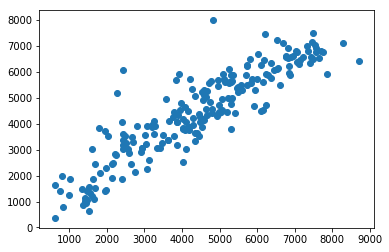

In [410]:
plt.scatter(Yimp_test,pred_lrimp)

In [411]:
#model accuracy calculation
#MAPE score
def MAPE(Y_test,pred_DT):
    mape=np.mean(np.abs((Y_test-pred_DT)/Y_test)*100)
    return mape

In [412]:
#MAPE score for original data
#Descion tree MAPE score
MAPE(Y_test,pred_DT)

22.206486169504743

In [413]:
#Random forest MAPE score
MAPE(Y_test,pred_rfr)

15.885944239508088

In [414]:
#LInear regression MAPE score
MAPE(Y_test,pred_lr)

17.452249892191084

In [415]:
#MAPE score with only importaint data
#Descion tree MAPE score
MAPE(Yimp_test,pred_dtreeimp)

24.070748167091523

In [416]:
#Random Forest MAPE score
MAPE(Yimp_test,pred_rfrimp)

16.703319987643056

In [417]:
#Linear Regression MAPE score
MAPE(Yimp_test,pred_lrimp)

19.05302108074179

In [418]:
#r2 score
from sklearn.metrics import r2_score

In [419]:
#r2 score for original data
#Desicion tree
r2_score(Y_test,pred_DT)

0.7406193739084777

In [420]:
#Random Forest
r2_score(Y_test,pred_rfr)

0.8836187675662355

In [421]:
#linear Regression
r2_score(Y_test,pred_lr)

0.8243214630530094

In [422]:
#r2 score for importaint data
#Descion tree
r2_score(Yimp_test,pred_dtreeimp)

0.7339289747569537

In [423]:
#Random Forest
r2_score(Yimp_test,pred_rfrimp)

0.8691371494243503

In [424]:
#Linear Regression
r2_score(Yimp_test,pred_lrimp)

0.8111219360098425

Text(0.5,1,'Residual plot')

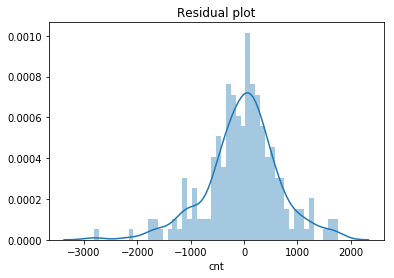

In [425]:
#Residual Plots
sns.distplot((Yimp_test-pred_rfrimp),bins=50)
plt.title('Residual plot')

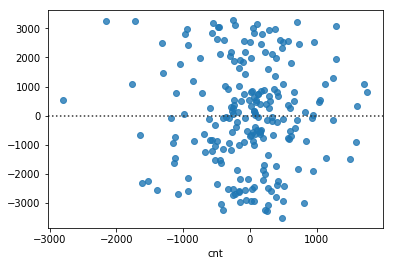

In [426]:
sns.residplot((Yimp_test-pred_rfrimp),pred_rfrimp)

In [427]:
#predicted output saving as excel file
predicted_output=pd.DataFrame(pred_rfrimp.round(0))

In [428]:
predicted_output.rename(columns={0:'Predicted_cnt'},inplace=True)

In [429]:
predicted_output.head()

,Predicted_cnt
0,6377.0
1,7000.0
2,2936.0
3,3539.0
4,6536.0


In [430]:
predicted_output.reset_index(0,inplace=True)

In [431]:
Yimp_test_df=pd.DataFrame(Yimp_test)

In [432]:
Yimp_test_df.head()

,cnt
458,6772
604,6917
378,2493
391,3456
625,6869


In [433]:
input_df_bike_cnt=Ximp_test.join(Yimp_test_df,how='inner')

In [434]:
input_df_bike_cnt.head()

,temp,yr_0,yr_1,hum,season_4,windspeed,season_1,cnt
458,0.466667,0,1,0.396667,0,0.100133,0,6772
604,0.703333,0,1,0.730417,0,0.128733,0,6917
378,0.180000,0,1,0.457500,0,0.187183,1,2493
391,0.425000,0,1,0.741250,0,0.342667,1,3456
625,0.580833,0,1,0.734583,0,0.151742,0,6869


In [435]:
input_df_bike_cnt.reset_index(0,inplace=True)

In [436]:
input_df_bike_cnt.head()

,index,temp,yr_0,yr_1,hum,season_4,windspeed,season_1,cnt
0,458,0.466667,0,1,0.396667,0,0.100133,0,6772
1,604,0.703333,0,1,0.730417,0,0.128733,0,6917
2,378,0.180000,0,1,0.457500,0,0.187183,1,2493
3,391,0.425000,0,1,0.741250,0,0.342667,1,3456
4,625,0.580833,0,1,0.734583,0,0.151742,0,6869


In [437]:
sample_output=input_df_bike_cnt.join(predicted_output,how='inner',lsuffix='_left',rsuffix='_right')

In [438]:
sample_output.drop(['index_left','index_right'],axis=1,inplace=True)

In [439]:
sample_output.head()

,temp,yr_0,yr_1,hum,season_4,windspeed,season_1,cnt,Predicted_cnt
0,0.466667,0,1,0.396667,0,0.100133,0,6772,6377.0
1,0.703333,0,1,0.730417,0,0.128733,0,6917,7000.0
2,0.180000,0,1,0.457500,0,0.187183,1,2493,2936.0
3,0.425000,0,1,0.741250,0,0.342667,1,3456,3539.0
4,0.580833,0,1,0.734583,0,0.151742,0,6869,6536.0


In [440]:
sample_output.to_excel('sample output final.xlsx',index=False)